here 4


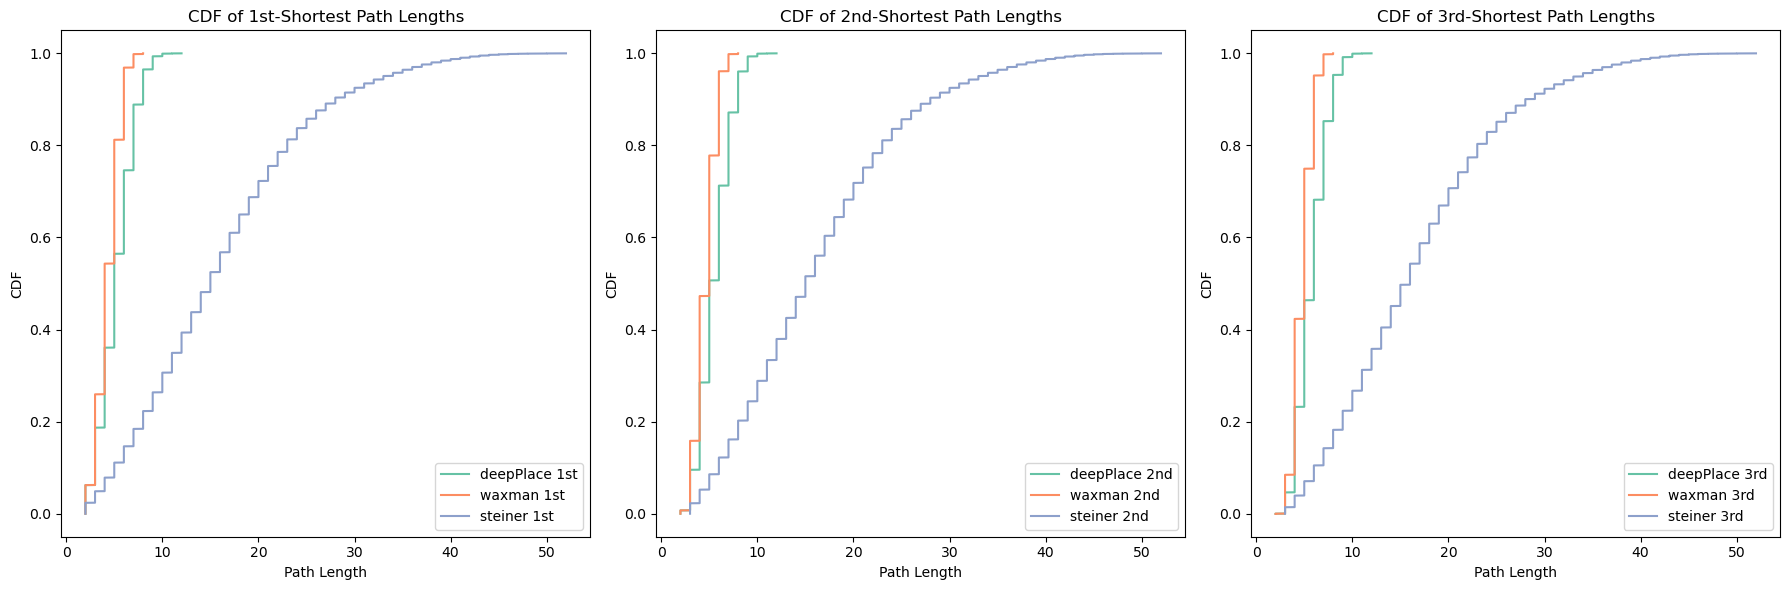

In [19]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from itertools import islice

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "steiner", "solver-based"]
n_values = [100]#[25, 50, 100, 200, 400]
topo_indices = range(10)
dir_path = "../dist/topos/"
# 存储所有跳数数据
path_lengths = {name: {n: {'1st': [], '2nd': [], '3rd': []} for n in n_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    #print("here 1")
                    for u, v in combinations(endnodes, 2):
                    # Random select 10 pairs of endnodes
                    # for i in range(1):
                    #     u, v = np.random.choice(endnodes, 2, replace=False)
                        try:
                            # has_circle = nx.has_path(G, u, v)
                            # print(u, v, "here", has_circle)

                            lengths = list(islice(nx.shortest_simple_paths(G, u, v, ), 3))#nx.shortest_path(G, u, v) #list(nx.shortest_path(G, u, v))[:1]#list(nx.shortest_simple_paths(G, u, v))[:3]
                            # print(lengths)
                            if len(lengths) > 0:
                                path_lengths[name][n]['1st'].append(len(lengths[0]) - 1)
                            if len(lengths) > 1:
                                path_lengths[name][n]['2nd'].append(len(lengths[1]) - 1)
                            if len(lengths) > 2:
                                path_lengths[name][n]['3rd'].append(len(lengths[2]) - 1)
                        except nx.NetworkXNoPath:
                            pass
                    #print("here 2")

# 绘制 CDF 图
def plot_cdf(data, label, color):
    data_sorted = np.sort(data)
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    plt.plot(data_sorted, cdf, label=label, color=color)

#print("here 3")
colors = sns.color_palette("Set2", len(names))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, path_type in enumerate(['1st', '2nd', '3rd']):
    for name, color in zip(names, colors):
        all_lengths = []
        for n in n_values:
            all_lengths.extend(path_lengths[name][n][path_type])
        if all_lengths:
            plt.sca(axes[i])
            plot_cdf(all_lengths, f"{name} {path_type}", color)
    axes[i].set_title(f"CDF of {path_type}-Shortest Path Lengths")
    axes[i].set_xlabel('Path Length')
    axes[i].set_ylabel('CDF')
    axes[i].legend()

print("here 4")
plt.tight_layout()
plt.show()


In [1]:
from endnodes_gen import endnode_graph_gen_different_map_size

from iter_kms_ga_differ_map_size import KmsGaDms
from waxman_differ_map_size import construct_waxman_different_map_size
from grid_steiner_differ_map_size import construct_steiner_tree_different_map_size

from demand_gen import Demand
from config import abs_file_path
import os
topo_num = 1
endnode_nums = [100]#, 25], 50, 200, 400, 800]
endnodes_files = []

# Generate endnodes files with different map sizes
map_sizes = [500, 1000, 1500, 2000, 2500]
topo_idxes = range(1, 10)
for topo_idx in topo_idxes:
  for map_size in map_sizes:
    endnode_graph_gen_different_map_size(n=100, topoIdx=topo_idx, map_size=map_size)
    file_name = abs_file_path + "/dist/endnodes/endnodesLocs-" + str(map_size) + "-100-{topo_idx}.json".format(topo_idx=topo_idx)
    # endnodes_files.append("../dist/endnodes/endnodesLocs-2000-100-0.json")
    endnodes_files.append(file_name)



print (endnodes_files)

map_size_grid_size_map = {500: 10, 1000: 15, 1500: 16, 2000: 17, 2500: 17}

for f in endnodes_files:
    map_size = int(f.split("-")[1])
    print ("map size: " + str(map_size))

    construct_steiner_tree_different_map_size(f, map_size=map_size, grid_size=map_size_grid_size_map[map_size])
    print ("steiner tree generated for " + f)

    # kms = KmsGaDms()
    # kms.iterate_kms_ga(f, map_size=map_size, step_size=map_size_grid_size_map[map_size])
    # print ("kms ga generated")
    # construct_waxman_different_map_size(f, degree=5, edge_len=1000)  
    # print ("waxman graph generated for " + f)

['/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-500-100-1.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-1000-100-1.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-1500-100-1.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-2000-100-1.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-2500-100-1.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-500-100-2.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-1000-100-2.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-1500-100-2.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-2000-100-2.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-2500-100-2.json', '/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesL